# CA5 Phase 2
## Mohammad Ali Zare
### 810197626

In this assignment we must classify Xray scans of patients and tell if they're **Normal**, or they have **Covid19**/**Pneuma**.


We do this using neural networks and will try different parameters to see how the performance of the model would change.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [ ]:
LABELS = ['COVID19', 'NORMAL', 'PNEUMA']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/AI/xray.zip

In [ ]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
  './Data/train', color_mode='grayscale', batch_size=32, image_size=(80, 80))

Found 5144 files belonging to 3 classes.


In [ ]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
  './Data/test', color_mode='grayscale', batch_size=32, image_size=(80, 80))

Found 1288 files belonging to 3 classes.


# 2

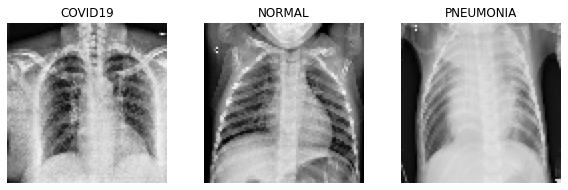

In [ ]:
plt.figure(figsize=(10, 10))
for imgs, labels in train_dataset.take(1):
  class_i = []
  class_i.append(np.where(labels == 0)[0][0])
  class_i.append(np.where(labels == 1)[0][0])
  class_i.append(np.where(labels == 2)[0][0])
  for j,i in enumerate(class_i):
    ax = plt.subplot(3, 3, j+1)
    plt.imshow(imgs[i].numpy().astype("uint8")[:,:,0], cmap='Greys_r')
    plt.title(train_dataset.class_names[labels[i]])
    plt.axis('off')
  

In [ ]:
counts = [0, 0, 0]
for imgs, labels in train_dataset.take(-1):
  for i,c in enumerate(np.unique(labels, return_counts=True)[1]):
    counts[i] += c

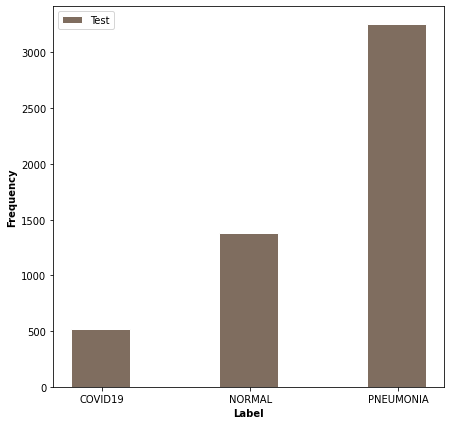

In [ ]:
barWidth = 0.4
plt.figure(figsize=(7, 7))

bars1 = counts
 
r1 = np.arange(len(bars1))
 
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Test')
 
plt.xlabel('Label', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks([r + 0.01 for r in range(len(bars1))], train_dataset.class_names)

plt.legend()
plt.show()

--------

In [ ]:
def plot_report(report):
  plt.figure(figsize=(8,8))
  plt.plot(report.history['loss'], label='Train')
  plt.plot(report.history['val_loss'], label='Test')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title('Loss Plot')
  plt.legend()
  plt.show()

  plt.figure(figsize=(8,8))
  plt.plot(report.history['accuracy'], label='Train')
  plt.plot(report.history['val_accuracy'], label='Test')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.title('Accuracy Plot')
  plt.legend()
  plt.show()

----


# 3. Model Summary

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [ ]:
inp = keras.layers.Input(shape=(80,80,1))
out = keras.layers.Flatten()(inp)
out = keras.layers.Dense(1024, activation='relu')(out)
out = keras.layers.Dense(1024, activation='relu')(out)
out = keras.layers.Dense(3, activation='softmax')(out)

model = keras.models.Model(inputs=inp, outputs=out)

In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy', keras.metrics.Precision()]
)

### Summary

The summary shows that our network has 4 layers. The first Layer is our input layers which has 80*80 nuerons (pixel count). Second and third layers are our hidden layers and both have 1024 neurons. And the last layers is our output layers which has 3 neurons (each representing our classes). Overall we have 7,607,299 parameters (weights and biases) to train.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


------------

# 4. Tanh and Relu (non-normalized data)

In [ ]:
dataGen = keras.preprocessing.image.ImageDataGenerator()

ntrain_dataset = dataGen.flow_from_directory(
    '/content/Data/train',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

ntest_dataset = dataGen.flow_from_directory(
    '/content/Data/test',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

nunshuffled_train = dataGen.flow_from_directory(
    '/content/Data/train',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)

nunshuffled_test = dataGen.flow_from_directory(
    '/content/Data/test',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


## Relu

As it can be seen in plot and report of the model, it doesn't train at all. The reason is our activation function is Relu and the data is not normalized. As the Relu function is not bounded, it can produce large numbers so it may cause gradiant explosion with large inputs and numbers would overflow. For this reason the loss in first epoch increased instantly and then became NaN so the network couldn't learn.

Epoch 1/10
161/161 [==============================] - 144s 893ms/step - loss: nan - accuracy: 0.1391 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 144s 894ms/step - loss: nan - accuracy: 0.0942 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 144s 894ms/step - loss: nan - accuracy: 0.0880 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 143s 889ms/step - loss: nan - accuracy: 0.0867 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 143s 887ms/step - loss: nan - accuracy: 0.0956 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 142s 884ms/step - loss: nan - accuracy: 0.0873 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 143s 889ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

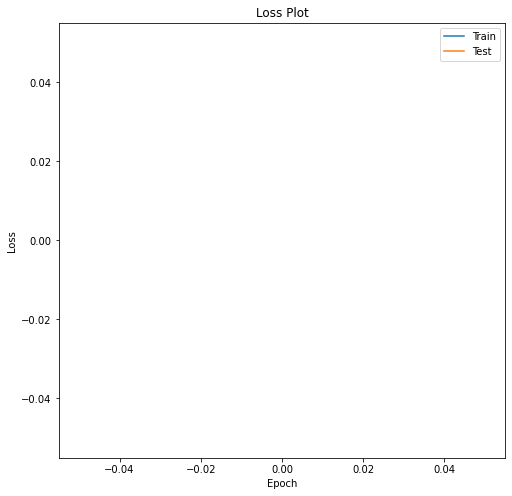

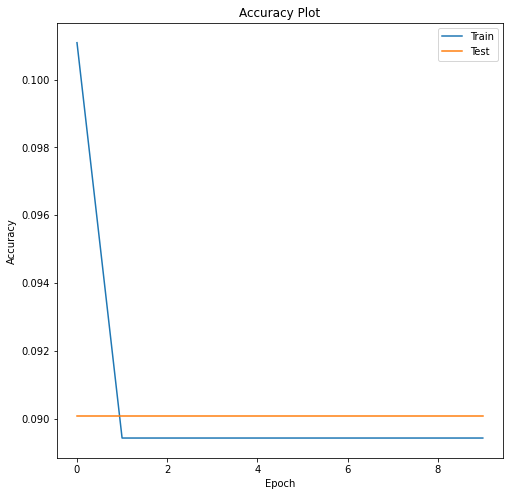

Test:
              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288


Train:
              precision    recall  f1-score   support

           0       0.09      1.00      0.16       460
           1       0.00      0.00      0.00      1266
           2       0.00      0.00      0.00      3418

    accuracy                           0.09      5144
   macro avg       0.03      0.33      0.05      5144
weighted avg       0.01      0.09      0.01      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

report0 = model.fit(ntrain_dataset, validation_data=ntest_dataset, epochs=10)

plot_report(report0)

pred1_test = model.predict(nunshuffled_test, batch_size=32)
pred1_train = model.predict(nunshuffled_train, batch_size=32)
print("Test:")
print(classification_report(nunshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(nunshuffled_train.labels, np.argmax(pred1_train, axis=1)))

## Tanh

We can see in the plot that the accuracy and loss aren't changing much. The reason here is **Vanishing Gradiant**. As the output of Tanh is in range of -1 and 1, the gradiants would be too small, and furthermore, in the back-prop process they become even smaller as they are using the chain rule. So as a result of this, the updates to weights and biases are too small and not much learning will happen.

Epoch 1/10
161/161 [==============================] - 144s 895ms/step - loss: 1.5753 - accuracy: 0.5213 - val_loss: 0.8660 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 143s 886ms/step - loss: 0.9836 - accuracy: 0.6224 - val_loss: 1.1966 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 143s 887ms/step - loss: 0.9550 - accuracy: 0.6031 - val_loss: 0.8489 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 144s 891ms/step - loss: 0.9743 - accuracy: 0.5918 - val_loss: 0.8519 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 143s 891ms/step - loss: 0.8903 - accuracy: 0.6373 - val_loss: 0.8475 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 143s 892ms/step - loss: 0.8943 - accuracy: 0.6364 - val_loss: 0.8385 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 142s 886ms/step - loss: 0.8762 - accuracy: 0.6610 - val_loss: 0.8713 -

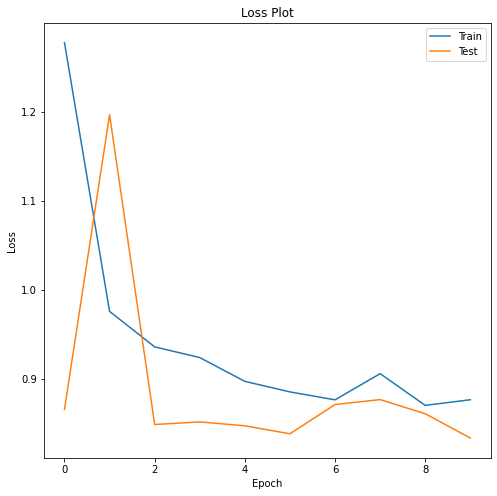

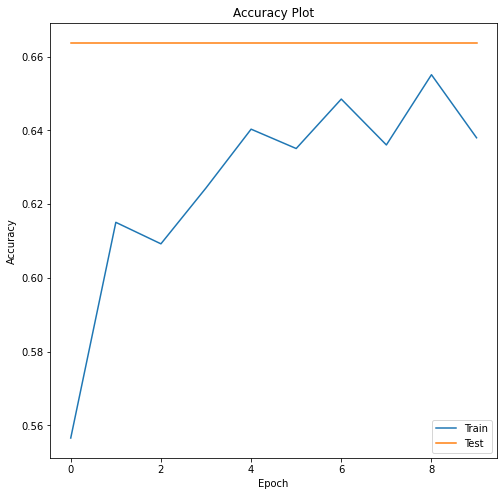

Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288


Train:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='tanh'))
model.add(keras.layers.Dense(1024, activation='tanh'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

report00 = model.fit(ntrain_dataset, validation_data=ntest_dataset, epochs=10)

plot_report(report00)

pred1_test = model.predict(nunshuffled_test, batch_size=32)
pred1_train = model.predict(nunshuffled_train, batch_size=32)
print("Test:")
print(classification_report(nunshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(nunshuffled_train.labels, np.argmax(pred1_train, axis=1)))

## 4.3.

Tanh output is bounded so it won't cause overflow as the Relu did. But in both cases the network couldn't learn at all. Normalization can help with it. Because for Relu the values would be smaller and won't cause overflow or explosion and in Tanh the updates will be more effective.

# 5

With trying different networks, the current model had acceptable F1 scores above 0.90.

In [ ]:
dataGenNorm = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_dataset = dataGenNorm.flow_from_directory(
    '/content/Data/train',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
)

test_dataset = dataGenNorm.flow_from_directory(
    '/content/Data/test',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32
)

unshuffled_train = dataGenNorm.flow_from_directory(
    '/content/Data/train',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)

unshuffled_test = dataGenNorm.flow_from_directory(
    '/content/Data/test',
    target_size=(80,80),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy', keras.metrics.Precision()]
)

In [ ]:
report1 = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
161/161 [==============================] - 144s 893ms/step - loss: 0.6856 - accuracy: 0.7033 - precision_2: 0.7236 - val_loss: 0.5432 - val_accuracy: 0.7384 - val_precision_2: 0.7510
Epoch 2/10
161/161 [==============================] - 143s 887ms/step - loss: 0.4016 - accuracy: 0.8366 - precision_2: 0.8413 - val_loss: 0.2639 - val_accuracy: 0.9123 - val_precision_2: 0.9209
Epoch 3/10
161/161 [==============================] - 142s 885ms/step - loss: 0.3387 - accuracy: 0.8655 - precision_2: 0.8697 - val_loss: 0.2398 - val_accuracy: 0.9107 - val_precision_2: 0.9153
Epoch 4/10
161/161 [==============================] - 143s 887ms/step - loss: 0.3157 - accuracy: 0.8762 - precision_2: 0.8792 - val_loss: 0.2023 - val_accuracy: 0.9262 - val_precision_2: 0.9281
Epoch 5/10
161/161 [==============================] - 142s 882ms/step - loss: 0.2889 - accuracy: 0.8920 - precision_2: 0.8973 - val_loss: 0.2035 - val_accuracy: 0.9239 - val_precision_2: 0.9280
Epoch 6/10
161/161 [==========

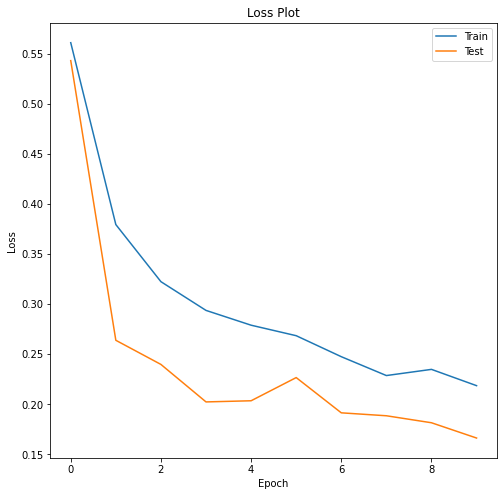

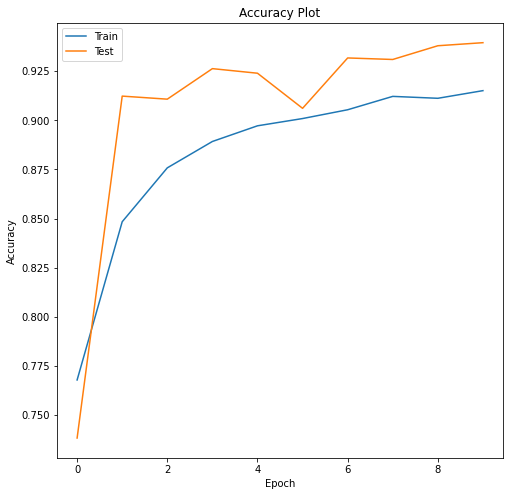

In [ ]:
plot_report(report1)

In [ ]:
pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))

Test:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       116
           1       0.91      0.89      0.90       317
           2       0.95      0.97      0.96       855

    accuracy                           0.94      1288
   macro avg       0.94      0.91      0.92      1288
weighted avg       0.94      0.94      0.94      1288


Train:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       460
           1       0.90      0.85      0.88      1266
           2       0.94      0.97      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.93      0.90      0.91      5144
weighted avg       0.93      0.93      0.93      5144



# 6. Optimizers

#### I. Momentum

Normally, the updates to weights are product of learning rate and the gradiant of error/loss. But if we use momentum, we add a new term. For each new weight update, we add the product of momentum value and the previous update. So the previous updates are considered on each. Because of this one batch can't change the direction of descent if most of the previous batchs were moving toward a direction.

Using momentum the learning will happen faster as we will have bigger updates. It can also help us to skip the local minima because of the big update.

#### III. Is momentum always good?

A very large momentum can cause random behavior and can stop the learning proccess. And a very small value won't make much change.

#### IV. Adam 

### 6.2. momentum = 0.5

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), 
    metrics=['accuracy', keras.metrics.Precision()]
)

Epoch 1/10
161/161 [==============================] - 143s 889ms/step - loss: 0.6620 - accuracy: 0.7358 - precision_5: 0.7620 - val_loss: 0.2544 - val_accuracy: 0.9208 - val_precision_5: 0.9289
Epoch 2/10
161/161 [==============================] - 143s 887ms/step - loss: 0.3298 - accuracy: 0.8647 - precision_5: 0.8696 - val_loss: 0.1951 - val_accuracy: 0.9309 - val_precision_5: 0.9342
Epoch 3/10
161/161 [==============================] - 143s 886ms/step - loss: 0.2785 - accuracy: 0.9008 - precision_5: 0.9041 - val_loss: 0.3045 - val_accuracy: 0.8734 - val_precision_5: 0.8752
Epoch 4/10
161/161 [==============================] - 142s 887ms/step - loss: 0.2926 - accuracy: 0.8885 - precision_5: 0.8930 - val_loss: 0.1935 - val_accuracy: 0.9348 - val_precision_5: 0.9369
Epoch 5/10
161/161 [==============================] - 142s 886ms/step - loss: 0.2505 - accuracy: 0.9065 - precision_5: 0.9081 - val_loss: 0.2837 - val_accuracy: 0.8843 - val_precision_5: 0.8847
Epoch 6/10
161/161 [==========

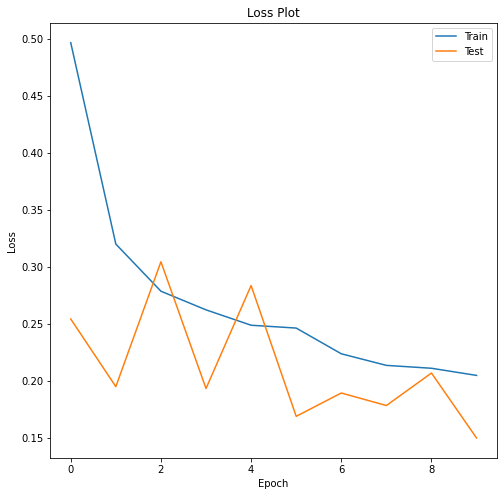

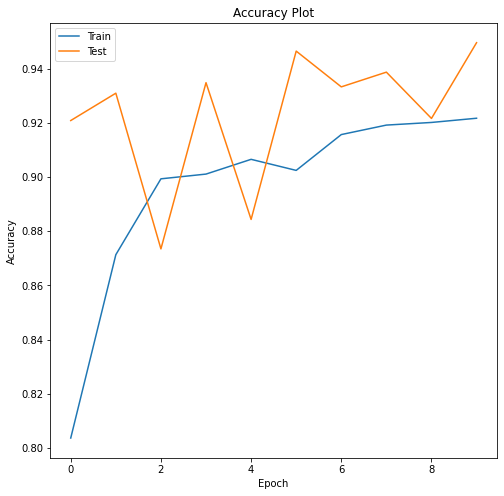

Test:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       116
           1       0.91      0.93      0.92       317
           2       0.96      0.97      0.97       855

    accuracy                           0.95      1288
   macro avg       0.95      0.92      0.93      1288
weighted avg       0.95      0.95      0.95      1288


Train:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       460
           1       0.90      0.90      0.90      1266
           2       0.95      0.97      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.94      0.91      0.92      5144
weighted avg       0.94      0.94      0.94      5144



In [ ]:
report2 = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

plot_report(report2)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))

### 6.2. momentum = 0.9

Epoch 1/10
161/161 [==============================] - 144s 893ms/step - loss: 0.7076 - accuracy: 0.7163 - precision_8: 0.7280 - val_loss: 0.2486 - val_accuracy: 0.9216 - val_precision_8: 0.9340
Epoch 2/10
161/161 [==============================] - 143s 888ms/step - loss: 0.3150 - accuracy: 0.8848 - precision_8: 0.8901 - val_loss: 0.2349 - val_accuracy: 0.9146 - val_precision_8: 0.9178
Epoch 3/10
161/161 [==============================] - 143s 889ms/step - loss: 0.2896 - accuracy: 0.8874 - precision_8: 0.8906 - val_loss: 0.1891 - val_accuracy: 0.9231 - val_precision_8: 0.9309
Epoch 4/10
161/161 [==============================] - 143s 888ms/step - loss: 0.2805 - accuracy: 0.8932 - precision_8: 0.8983 - val_loss: 0.2415 - val_accuracy: 0.9068 - val_precision_8: 0.9102
Epoch 5/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2507 - accuracy: 0.9047 - precision_8: 0.9082 - val_loss: 0.2455 - val_accuracy: 0.9014 - val_precision_8: 0.9066
Epoch 6/10
161/161 [==========

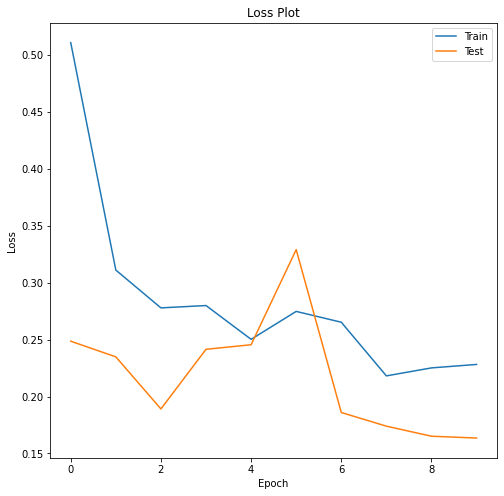

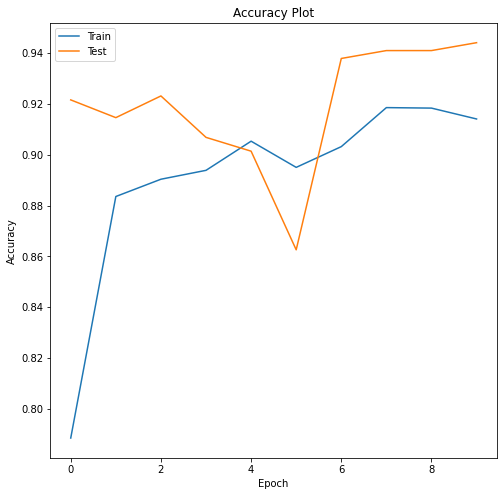

Test:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       116
           1       0.92      0.90      0.91       317
           2       0.95      0.98      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.90      0.92      1288
weighted avg       0.94      0.94      0.94      1288


Train:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       460
           1       0.93      0.85      0.89      1266
           2       0.94      0.98      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.94      0.90      0.92      5144
weighted avg       0.94      0.94      0.94      5144



In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
    metrics=['accuracy', keras.metrics.Precision()]
)

report3 = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

plot_report(report3)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))



### 6.2. momentum = 0.99

Epoch 1/10
161/161 [==============================] - 144s 892ms/step - loss: 0.7848 - accuracy: 0.6799 - precision_7: 0.6915 - val_loss: 0.2682 - val_accuracy: 0.8998 - val_precision_7: 0.9084
Epoch 2/10
161/161 [==============================] - 143s 886ms/step - loss: 0.4398 - accuracy: 0.8463 - precision_7: 0.8529 - val_loss: 0.9324 - val_accuracy: 0.6747 - val_precision_7: 0.6747
Epoch 3/10
161/161 [==============================] - 142s 884ms/step - loss: 1.0046 - accuracy: 0.6676 - precision_7: 0.6679 - val_loss: 0.8351 - val_accuracy: 0.6638 - val_precision_7: 0.6638
Epoch 4/10
161/161 [==============================] - 143s 889ms/step - loss: 0.8399 - accuracy: 0.6647 - precision_7: 0.6647 - val_loss: 0.8472 - val_accuracy: 0.6638 - val_precision_7: 0.6638
Epoch 5/10
161/161 [==============================] - 143s 887ms/step - loss: 0.8276 - accuracy: 0.6756 - precision_7: 0.6756 - val_loss: 0.8362 - val_accuracy: 0.6638 - val_precision_7: 0.6638
Epoch 6/10
161/161 [==========

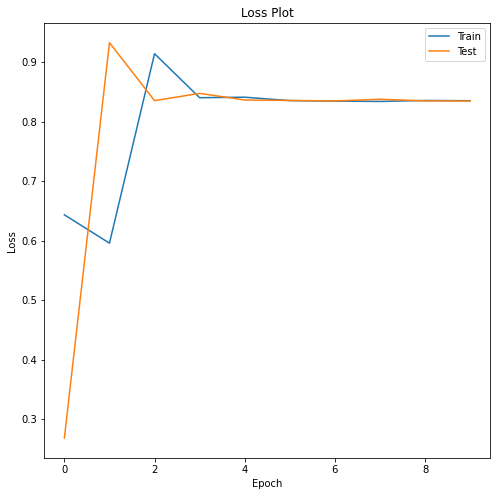

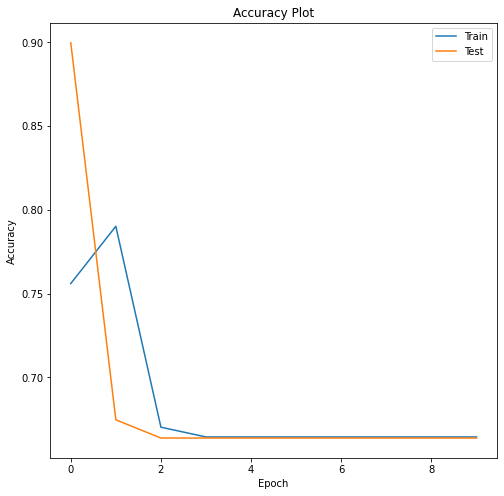

Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288


Train:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99), 
    metrics=['accuracy', keras.metrics.Precision()]
)

report4 = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

plot_report(report4)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))



## 6.2. Different Momentums

We can see with large momentum (0.99) the models doesn't perform good and stops learning.

With momentum = 0.5, the previous values aren't affecting the result as much as momentum = 0.9. As a result of this, the low momentum (0.5) still responds to the noises and has a more zigzagy behavior, but the 0.9 one is moving smoother because previous batches have more effect. Overall 0.9 seems a better compromise between the very high and low values.


## 6.4 Adam

We can see from the plot, Adam has less zigzagy behavior and moves faster toward a lower loss but SGD got slightly better results . This optimizer doesn't require much custom tuning Where SGD sometimes requires custom tuning for its parameters (we saw momentum as an example).

Epoch 1/10
161/161 [==============================] - 144s 893ms/step - loss: 1.7614 - accuracy: 0.6907 - precision_6: 0.7108 - val_loss: 0.2427 - val_accuracy: 0.9030 - val_precision_6: 0.9095
Epoch 2/10
161/161 [==============================] - 142s 883ms/step - loss: 0.2940 - accuracy: 0.8849 - precision_6: 0.8871 - val_loss: 0.4026 - val_accuracy: 0.8346 - val_precision_6: 0.8484
Epoch 3/10
161/161 [==============================] - 143s 886ms/step - loss: 0.3097 - accuracy: 0.8824 - precision_6: 0.8905 - val_loss: 0.2521 - val_accuracy: 0.9068 - val_precision_6: 0.9152
Epoch 4/10
161/161 [==============================] - 142s 885ms/step - loss: 0.2583 - accuracy: 0.9083 - precision_6: 0.9142 - val_loss: 0.1940 - val_accuracy: 0.9262 - val_precision_6: 0.9311
Epoch 5/10
161/161 [==============================] - 142s 883ms/step - loss: 0.2528 - accuracy: 0.9001 - precision_6: 0.9036 - val_loss: 0.1945 - val_accuracy: 0.9262 - val_precision_6: 0.9291
Epoch 6/10
161/161 [==========

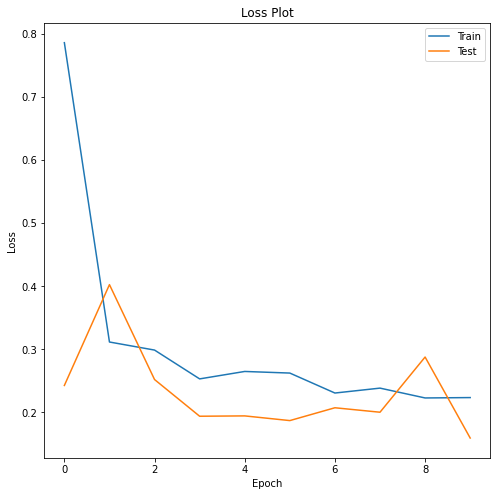

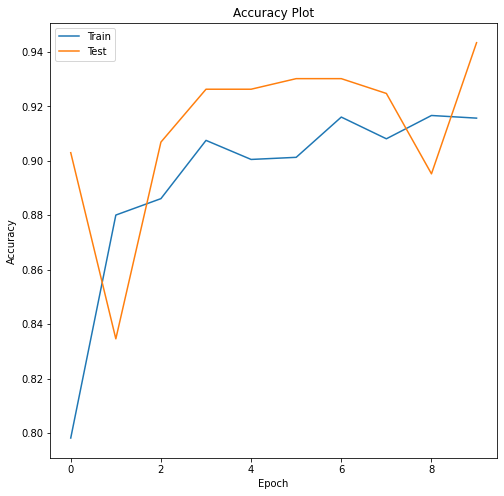

Test:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       116
           1       0.91      0.91      0.91       317
           2       0.96      0.96      0.96       855

    accuracy                           0.94      1288
   macro avg       0.92      0.92      0.92      1288
weighted avg       0.94      0.94      0.94      1288


Train:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       460
           1       0.92      0.88      0.90      1266
           2       0.95      0.97      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.93      0.92      0.92      5144
weighted avg       0.94      0.94      0.94      5144



In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy', keras.metrics.Precision()]
)

report5 = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

plot_report(report5)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))



# 7. Epoch

#### II. Why we need multiple epochs?

Models need to learn parameters for the input data. It learns gradually using usually with a gradual descent algorithm to minimize the loss/error. With a set of data the algorithm may not be able to update its parameters and generelize enough. Because of this we do the learning proccess in multiple iterations (epochs) to learn the data better. Another reason is we may not be able to have a lot of new data to train the model on, so we use the same data in multiple epochs to learn its features. But if we have enough data we may get the optimal result in one iteration.

#### III. Is more epochs always better?

Having a lot epochs may lead to overfitting. Because it learns the features of the data too much, that it even catches the noises. So it can't generalize well and although it has good performance on the train data, it doesn't perform good on the test data.

To prevent overfitting, we can use early-stopping techniques. It means we stop the learning process when the it evaluation data results start to worsening.

Epoch 1/20
161/161 [==============================] - 144s 893ms/step - loss: 1.6424 - accuracy: 0.6909 - precision_9: 0.7086 - val_loss: 0.3559 - val_accuracy: 0.8439 - val_precision_9: 0.8489
Epoch 2/20
161/161 [==============================] - 142s 881ms/step - loss: 0.3614 - accuracy: 0.8515 - precision_9: 0.8563 - val_loss: 0.2295 - val_accuracy: 0.9146 - val_precision_9: 0.9165
Epoch 3/20
161/161 [==============================] - 142s 881ms/step - loss: 0.2974 - accuracy: 0.8941 - precision_9: 0.8967 - val_loss: 0.2980 - val_accuracy: 0.8874 - val_precision_9: 0.8949
Epoch 4/20
161/161 [==============================] - 142s 881ms/step - loss: 0.2955 - accuracy: 0.8851 - precision_9: 0.8887 - val_loss: 0.1988 - val_accuracy: 0.9262 - val_precision_9: 0.9288
Epoch 5/20
161/161 [==============================] - 142s 882ms/step - loss: 0.2762 - accuracy: 0.8938 - precision_9: 0.8989 - val_loss: 0.1876 - val_accuracy: 0.9394 - val_precision_9: 0.9408
Epoch 6/20
161/161 [==========

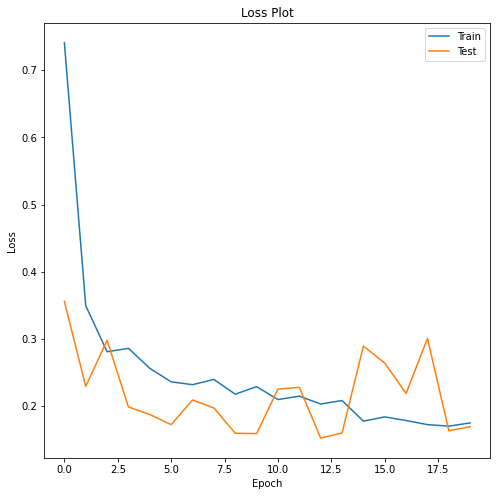

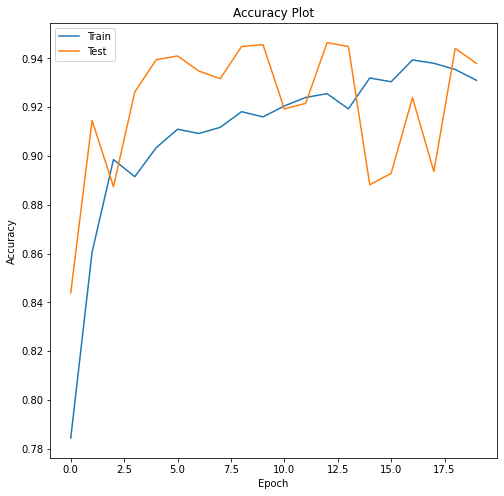

Test:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       116
           1       0.86      0.95      0.90       317
           2       0.97      0.94      0.96       855

    accuracy                           0.94      1288
   macro avg       0.92      0.92      0.92      1288
weighted avg       0.94      0.94      0.94      1288


Train:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       460
           1       0.87      0.95      0.91      1266
           2       0.98      0.95      0.96      3418

    accuracy                           0.95      5144
   macro avg       0.93      0.94      0.94      5144
weighted avg       0.95      0.95      0.95      5144



In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy', keras.metrics.Precision()]
)

report6 = model.fit(train_dataset, validation_data=test_dataset, epochs=20)

plot_report(report6)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))



# 8. Loss

#### I. MSE

We can see the model with MSE isn't good and it stop learning and stalls.

#### II. Why MSE is not good for classifaction?

The formula for MSE is  

$\frac{1}{n}((actual_1 - predict_1)^2 +  ... + (actual_n - predict_n)^2)$

If we calculate the gradian $\frac{dL}{dW}$ We reach something that has the term $(predict - actual)(x*predict(1-predict)$ and because we are classifying, the $predict$ is in range 0 and 1. So as the prediction approaches very close to 1 or 0 (being certain about a class) the gradian would become too small (because of $predict(1-predict)$). This causes very small updates to weights and the learning process will eventually stall early with no further update.


MSE is used mostly for regression problems.

Epoch 1/20
161/161 [==============================] - 145s 897ms/step - loss: 0.2209 - accuracy: 0.6631 - precision_10: 0.6703 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_precision_10: 0.6638
Epoch 2/20
161/161 [==============================] - 143s 893ms/step - loss: 0.2226 - accuracy: 0.6662 - precision_10: 0.6662 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_precision_10: 0.6638
Epoch 3/20
161/161 [==============================] - 143s 893ms/step - loss: 0.2210 - accuracy: 0.6686 - precision_10: 0.6686 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_precision_10: 0.6638
Epoch 4/20
161/161 [==============================] - 144s 895ms/step - loss: 0.2267 - accuracy: 0.6600 - precision_10: 0.6600 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_precision_10: 0.6638
Epoch 5/20
161/161 [==============================] - 143s 892ms/step - loss: 0.2244 - accuracy: 0.6634 - precision_10: 0.6634 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_precision_10: 0.6638
Epoch 6/20
161/161 [

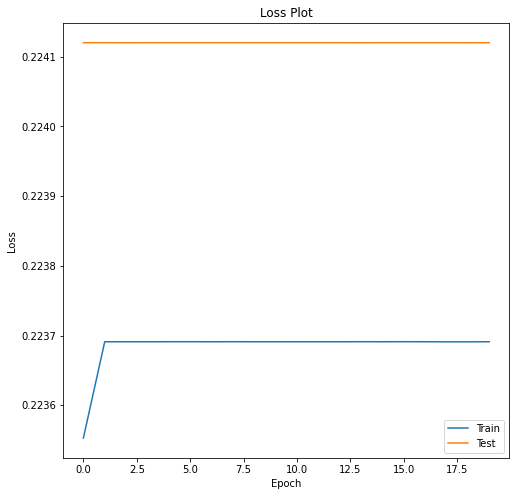

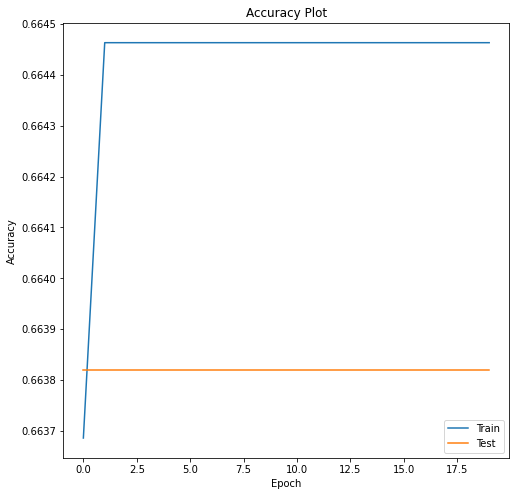

Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288


Train:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['accuracy', keras.metrics.Precision()]
)

report8 = model.fit(train_dataset, validation_data=test_dataset, epochs=20)

plot_report(report8)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))



# 9. Regularization

Regularization methods are used to prevent overfitting.

### 9.2. L2=0.0001

Using L2 method, in each update to weight, we add a product of constant and the previous weight. This constant is predefined and independent of the learning process, so this change to weight, keeps the model from overfitting to the train data and being perfect on that.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model.add(keras.layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model.add(keras.layers.Dense(3, activation='softmax', kernel_regularizer=keras.regularizers.l2(l2=0.0001)))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy', keras.metrics.Precision()]
)

report8 = model.fit(train_dataset, validation_data=test_dataset, epochs=20)

Epoch 1/20
161/161 [==============================] - 149s 914ms/step - loss: 1.6743 - accuracy: 0.7084 - precision: 0.7338 - val_loss: 0.4033 - val_accuracy: 0.9224 - val_precision: 0.9283
Epoch 2/20
161/161 [==============================] - 143s 891ms/step - loss: 0.4860 - accuracy: 0.8760 - precision: 0.8801 - val_loss: 0.5935 - val_accuracy: 0.8261 - val_precision: 0.8310
Epoch 3/20
161/161 [==============================] - 142s 886ms/step - loss: 0.5019 - accuracy: 0.8642 - precision: 0.8675 - val_loss: 0.3192 - val_accuracy: 0.9301 - val_precision: 0.9336
Epoch 4/20
161/161 [==============================] - 141s 881ms/step - loss: 0.3795 - accuracy: 0.9031 - precision: 0.9062 - val_loss: 0.3114 - val_accuracy: 0.9286 - val_precision: 0.9347
Epoch 5/20
161/161 [==============================] - 141s 880ms/step - loss: 0.3505 - accuracy: 0.9092 - precision: 0.9129 - val_loss: 0.2789 - val_accuracy: 0.9371 - val_precision: 0.9397
Epoch 6/20
161/161 [==============================

NameError: ignored

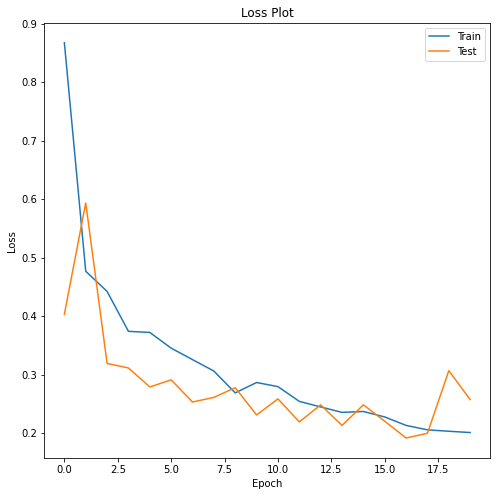

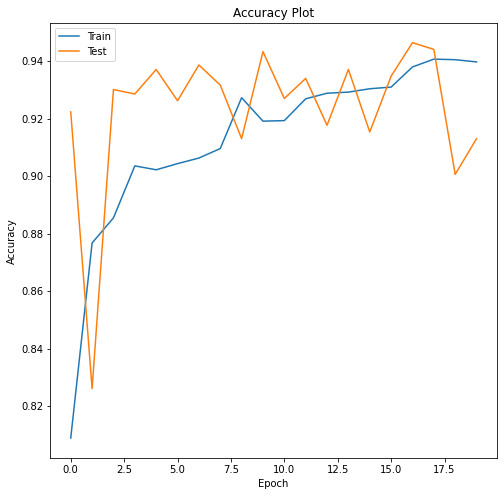

Test:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       116
           1       0.77      0.97      0.86       317
           2       0.98      0.90      0.94       855

    accuracy                           0.91      1288
   macro avg       0.90      0.91      0.90      1288
weighted avg       0.93      0.91      0.92      1288


Train:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       460
           1       0.78      0.98      0.87      1266
           2       0.99      0.90      0.94      3418

    accuracy                           0.92      5144
   macro avg       0.91      0.93      0.92      5144
weighted avg       0.93      0.92      0.92      5144



In [ ]:
plot_report(report8)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))

### 9.3. dropout = 0.1

To combat overfitting, ensemble methods can be used where multiple models results are combined to give one final result. But training multiple architectures is expensive. With dropout method we can simulate having multiple models. On each layer we randomly drop/ignore some neurons' outputs so it's like we have a layer with less neurons (different architecture). On each iteration the data are viewed from different model, so the overall result would be more generalized.

We can see from the plots and reports, this models performs good and doesn't suffer from overfitting.

Epoch 1/20
161/161 [==============================] - 145s 899ms/step - loss: 1.6637 - accuracy: 0.6771 - precision_1: 0.6975 - val_loss: 0.2380 - val_accuracy: 0.9138 - val_precision_1: 0.9143
Epoch 2/20
161/161 [==============================] - 144s 896ms/step - loss: 0.3299 - accuracy: 0.8717 - precision_1: 0.8755 - val_loss: 0.2324 - val_accuracy: 0.9154 - val_precision_1: 0.9220
Epoch 3/20
161/161 [==============================] - 143s 893ms/step - loss: 0.2964 - accuracy: 0.8832 - precision_1: 0.8891 - val_loss: 0.2656 - val_accuracy: 0.9053 - val_precision_1: 0.9083
Epoch 4/20
161/161 [==============================] - 143s 892ms/step - loss: 0.3493 - accuracy: 0.8714 - precision_1: 0.8759 - val_loss: 0.2496 - val_accuracy: 0.9022 - val_precision_1: 0.9090
Epoch 5/20
161/161 [==============================] - 143s 892ms/step - loss: 0.2654 - accuracy: 0.9012 - precision_1: 0.9037 - val_loss: 0.1919 - val_accuracy: 0.9332 - val_precision_1: 0.9405
Epoch 6/20
161/161 [==========

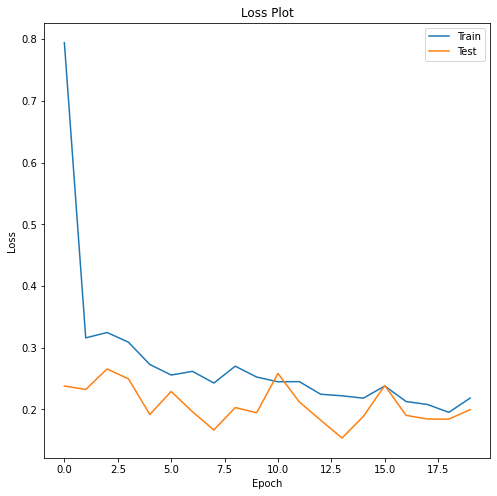

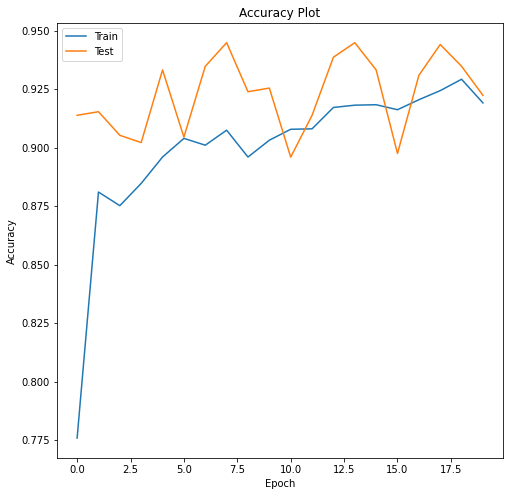

Test:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       116
           1       0.82      0.93      0.87       317
           2       0.97      0.94      0.95       855

    accuracy                           0.92      1288
   macro avg       0.91      0.88      0.89      1288
weighted avg       0.93      0.92      0.92      1288


Train:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       460
           1       0.83      0.94      0.88      1266
           2       0.96      0.94      0.95      3418

    accuracy                           0.92      5144
   macro avg       0.92      0.89      0.90      5144
weighted avg       0.93      0.92      0.92      5144



In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(80, 80, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy', keras.metrics.Precision()]
)

report9 = model.fit(train_dataset, validation_data=test_dataset, epochs=20)

plot_report(report9)

pred1_test = model.predict(unshuffled_test, batch_size=32)
pred1_train = model.predict(unshuffled_train, batch_size=32)
print("Test:")
print(classification_report(unshuffled_test.labels, np.argmax(pred1_test, axis=1)))
print("\nTrain:")
print(classification_report(unshuffled_train.labels, np.argmax(pred1_train, axis=1)))

